# Project Name : - Algerian Forest Fire Dataset EDA , FE &Temperature Prediction using Linear Regression,Ridge,Lasso,Elastic Net .

## 1) Problem statement .

* This dataset comprises of Algerian Forest Fire Dataset  taken from UCI . 
* Link of the dataset is as follows :- https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++ .

 



## 2) Data Collection.
* This dataset includes 244 instances that regroup a data of 2 regions of Algeria,namely the Brjajia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria .
* 122 instances for each region .
* The Period is from June 2012 to September 2012.The Dataset includes 11 attributes and 1 output attribute i.e. Temperature
* The data consists of 14 column and 246 rows.

### 2.1 Import Data and Required Packages

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Importing Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

**Loading the Algerian Forest Fire Dataset**

In [3]:
df=pd.read_csv(r"../input/algerian-forest-fire-dataset/Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


**Attribute Information :-**

**Period Covered**
* 1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

**Weather data observations**
* 2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
* 3. RH : Relative Humidity in %: 21 to 90
* 4. Ws :Wind speed in km/h: 6 to 29
* 5. Rain: total day in mm: 0 to 16.8

**FWI Components**
* 6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
* 7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
* 8. Drought Code (DC) index from the FWI system: 7 to 220.4
* 9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
* 10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
* 11. Fire Weather Index (FWI) Index: 0 to 31.1
* 12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€    

In [5]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [6]:
df.shape

(246, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [8]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [9]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [10]:
df.iloc[121:125,:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


# **2.2 Data Cleaning**

**Dropping row no 122 specifying region name  & 123 respecifying the header**

In [11]:
df.drop([122,123],inplace=True)

**Resetting the index and dropping the index column**

In [12]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

**Creating a new column called Region reprenting [0:- Bejaia and 1- Sidi Bel-abbes]**

In [13]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

**Checking the Column Headers**

In [14]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

**Removing unnecessary space in column headers using str.strip()**

In [15]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

**Dropping rows with null values**

In [16]:
df.dropna(inplace=True)

**Converting the necessary column dataye to int**

In [17]:
df.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

In [18]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]].astype(int)

In [19]:
df.dtypes

day             int64
month           int64
year            int64
Temperature     int64
RH              int64
Ws              int64
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int64
dtype: object

**Values in df[Classes] has unnecessary spaces that are removed by str.strip()**

In [20]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [21]:
df.Classes=df.Classes.str.strip()
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

**Converting the Necessary Column Datatype to Float**

In [22]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [23]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')

In [24]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

**Dropping the year column as the data is for the same year**

In [25]:
df1=df.drop(['year'],axis=1)

**DataFrame Description**

In [26]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0


# **3. Exploratory Data Analysis**

**Encoding not fire as 0 and Fire as 1**

In [27]:
df1['Classes']=np.where(df1['Classes']=='not fire ',0,1)

In [28]:
df1.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [29]:
df1.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,NaN,0.000821
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,NaN,0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,NaN,0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,NaN,-0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,NaN,-0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,NaN,-0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,NaN,0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,NaN,0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,NaN,-0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,NaN,0.263197


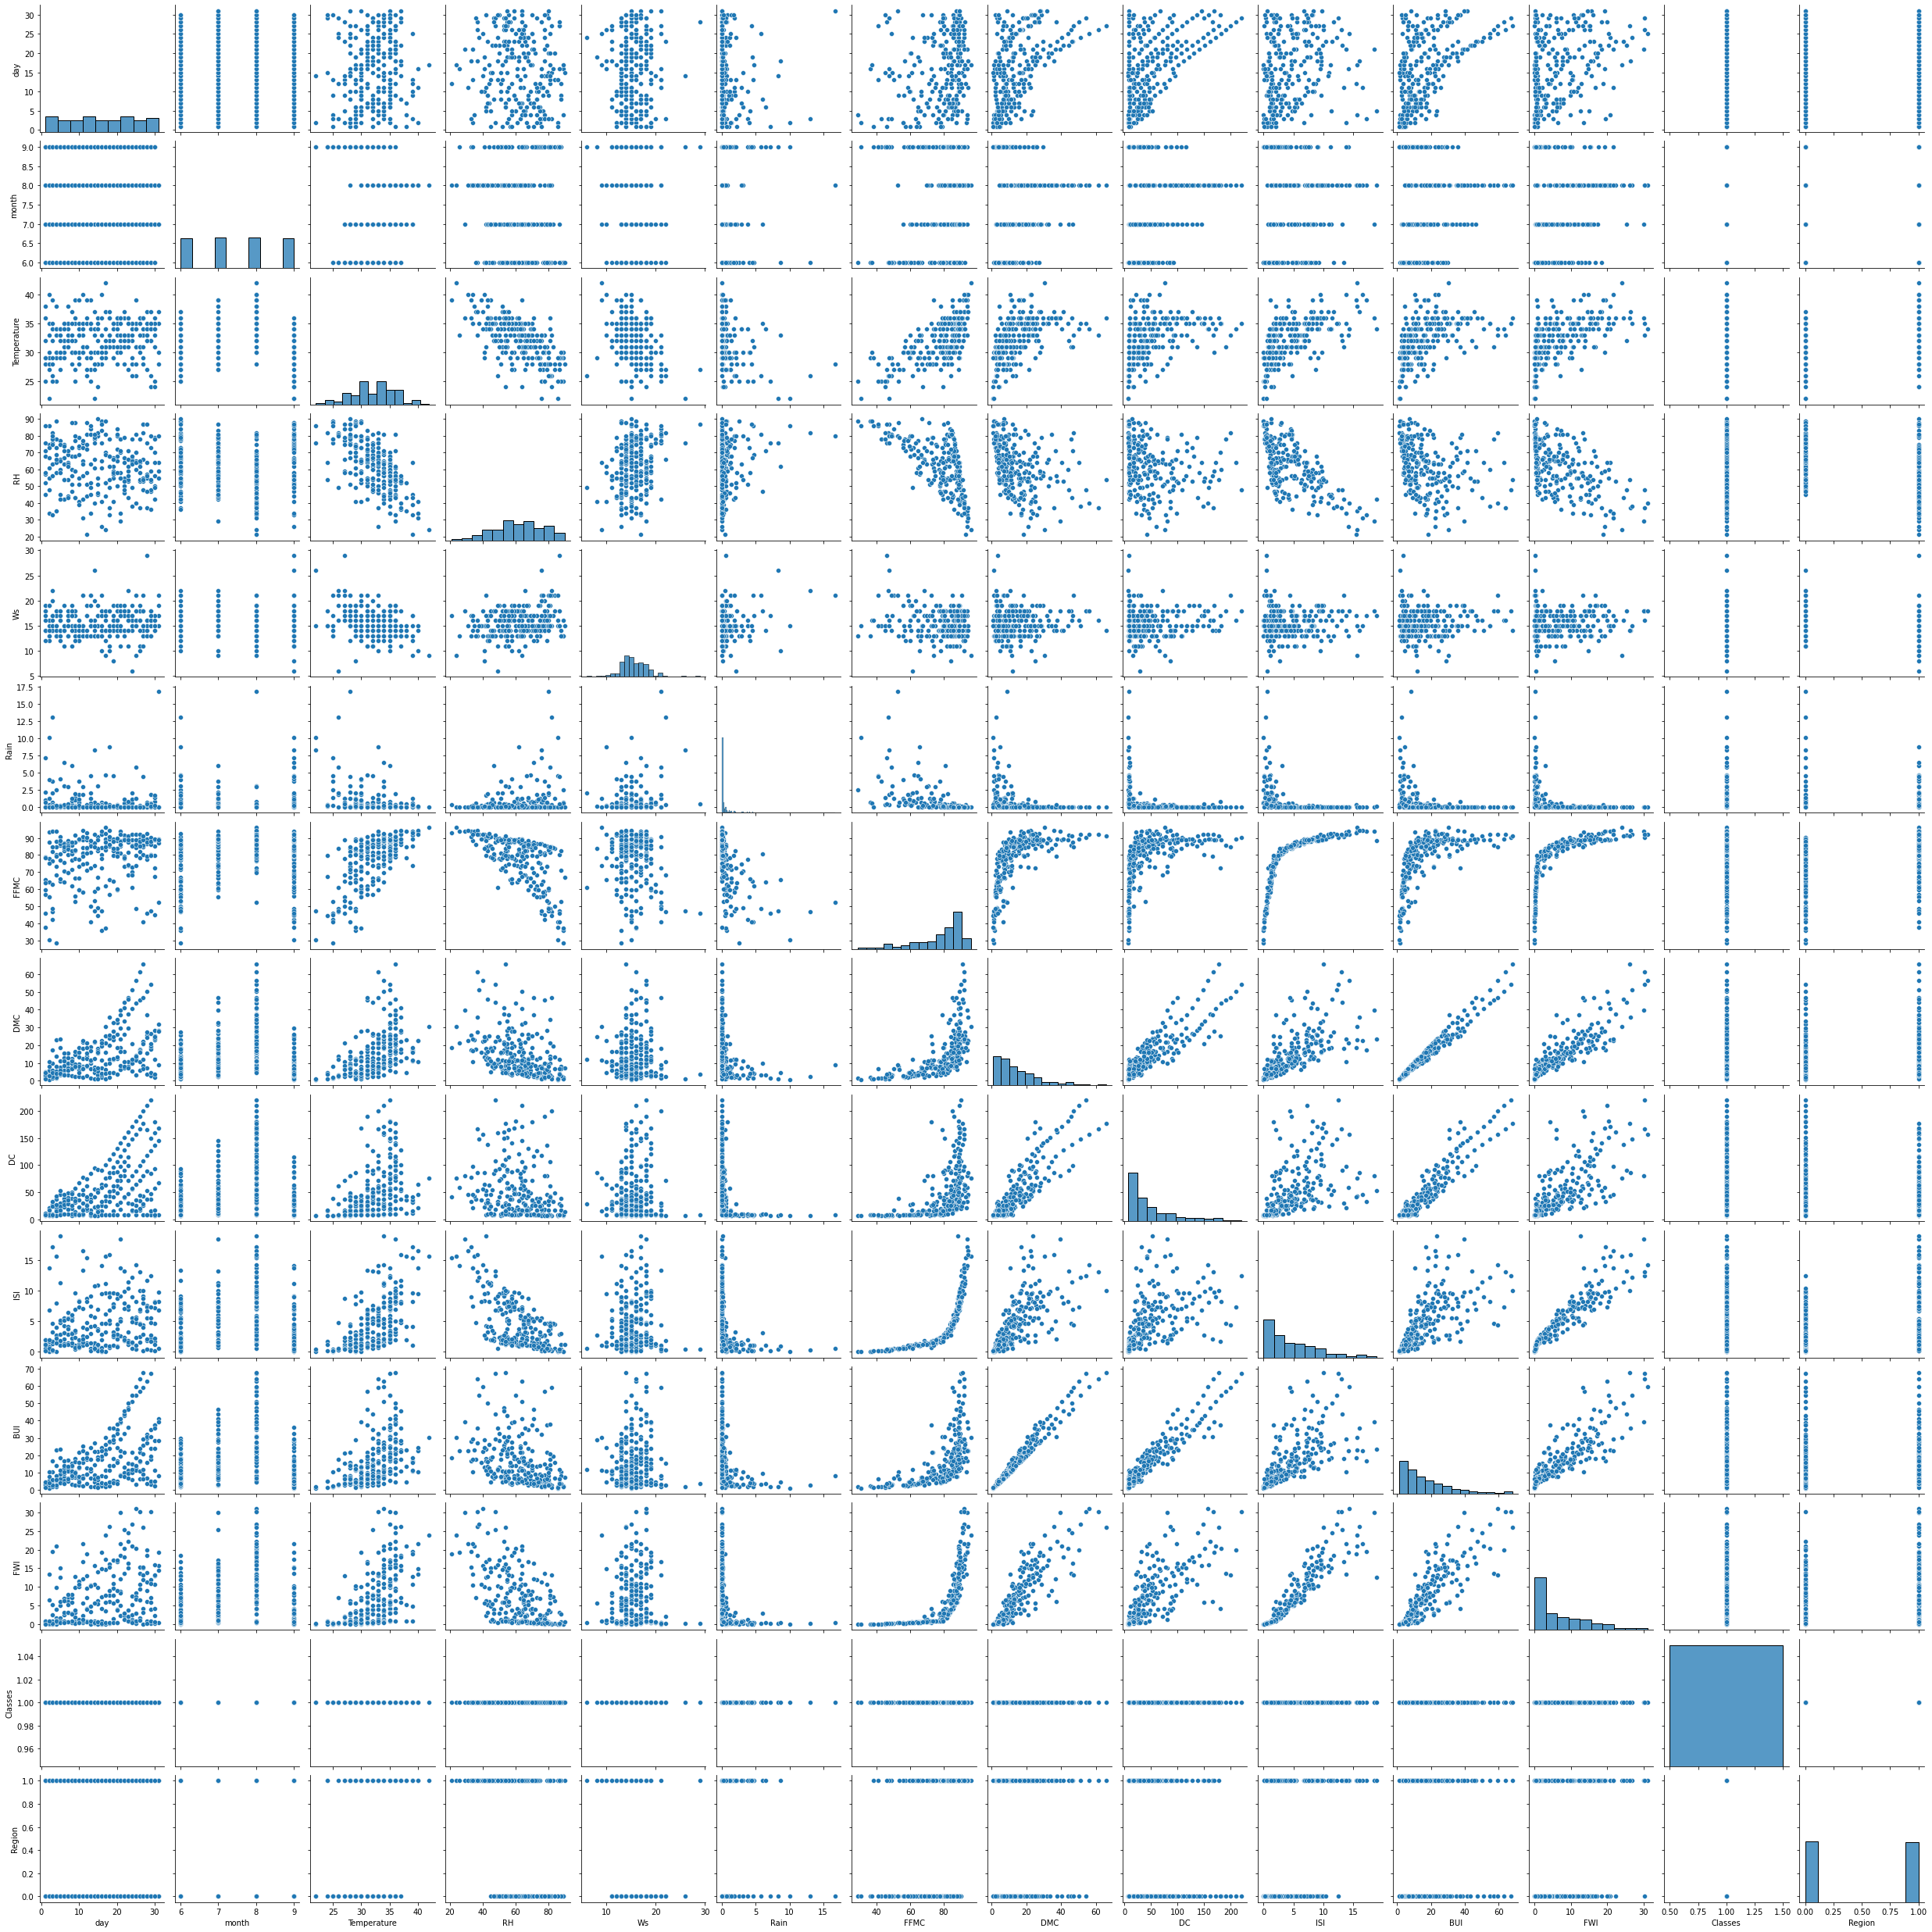

In [30]:
sns.pairplot(df1)

<AxesSubplot:>

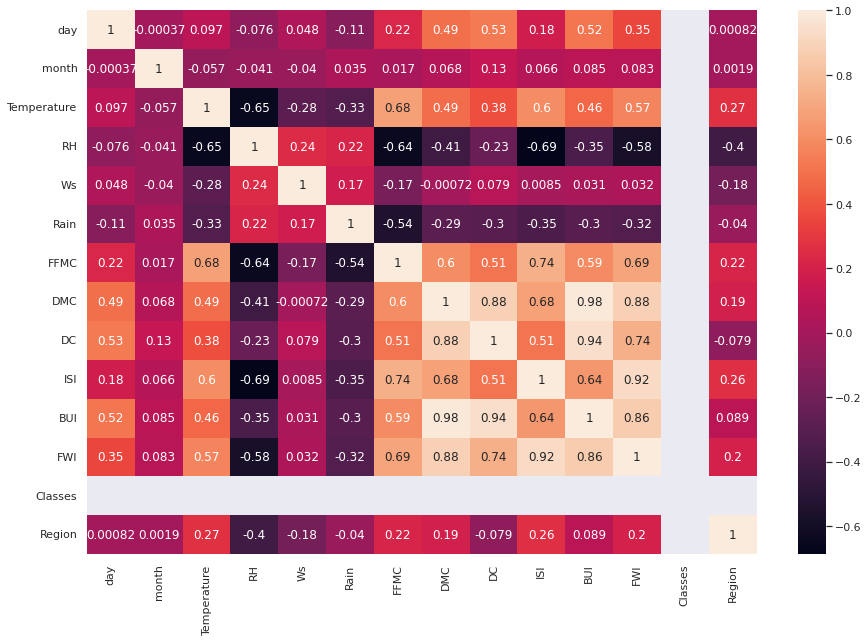

In [31]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df1.corr(),annot=True)

**Report** 
* RH is negatively corelated with Temperature, FFMC and ISI
* Rain is negatively correlated with Temperature and FFMC,DMC, ISI and BUI

In [32]:
df1.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Text(0, 0.5, 'Temperature')

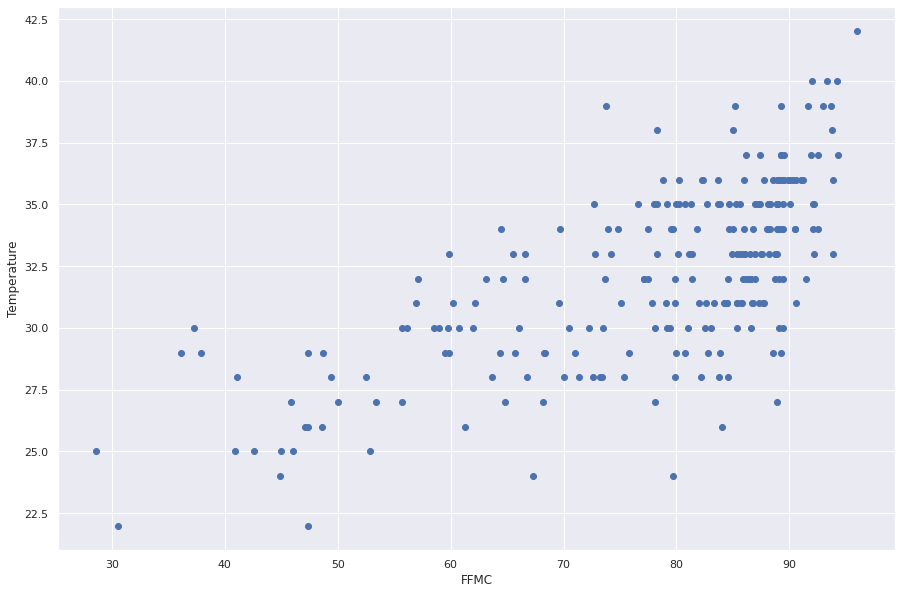

In [33]:
plt.scatter(df1['FFMC'],df1['Temperature'])
plt.xlabel("FFMC")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

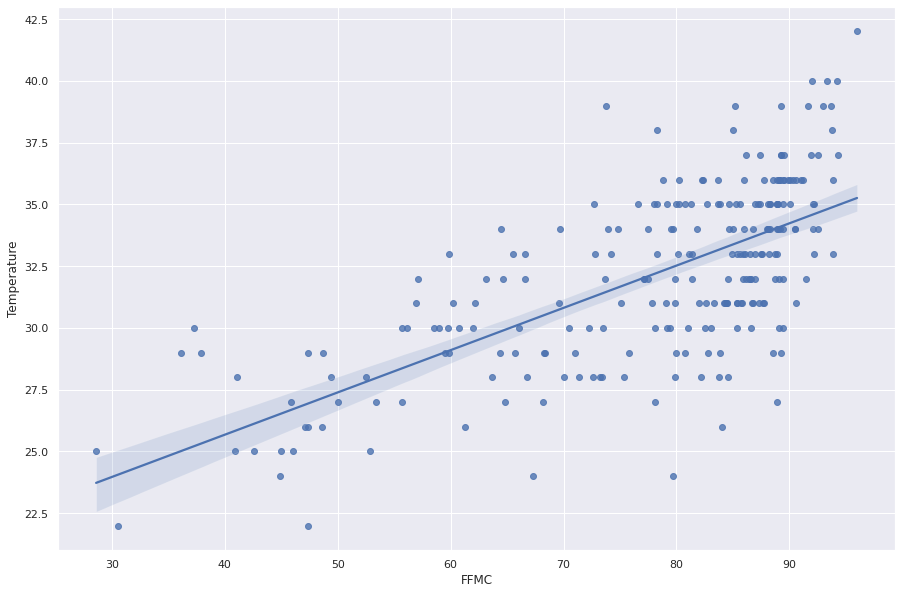

In [34]:
sns.regplot(x='FFMC',y='Temperature',data=df1)

Text(0, 0.5, 'Temperature')

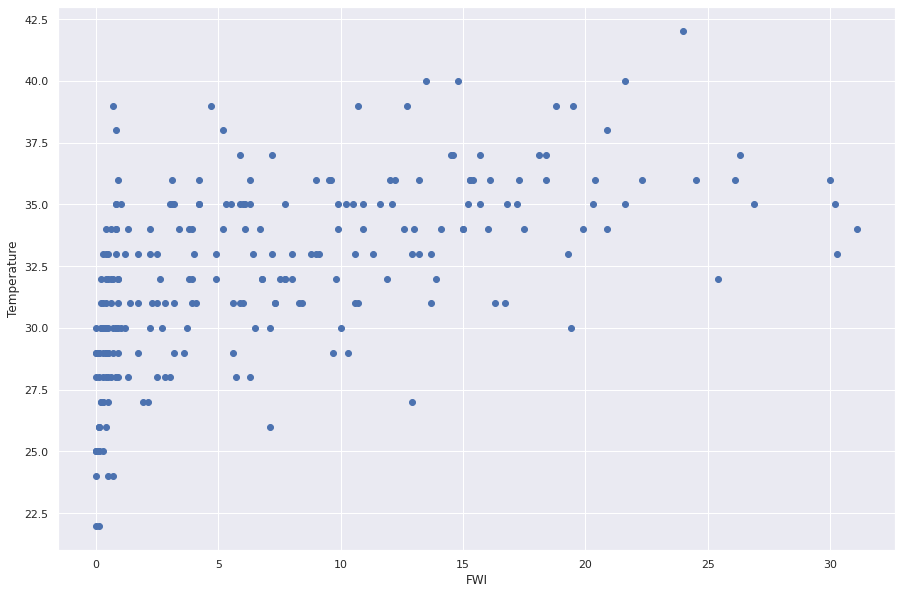

In [35]:
plt.scatter(df1['FWI'],df1['Temperature'])
plt.xlabel("FWI")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='FWI', ylabel='Temperature'>

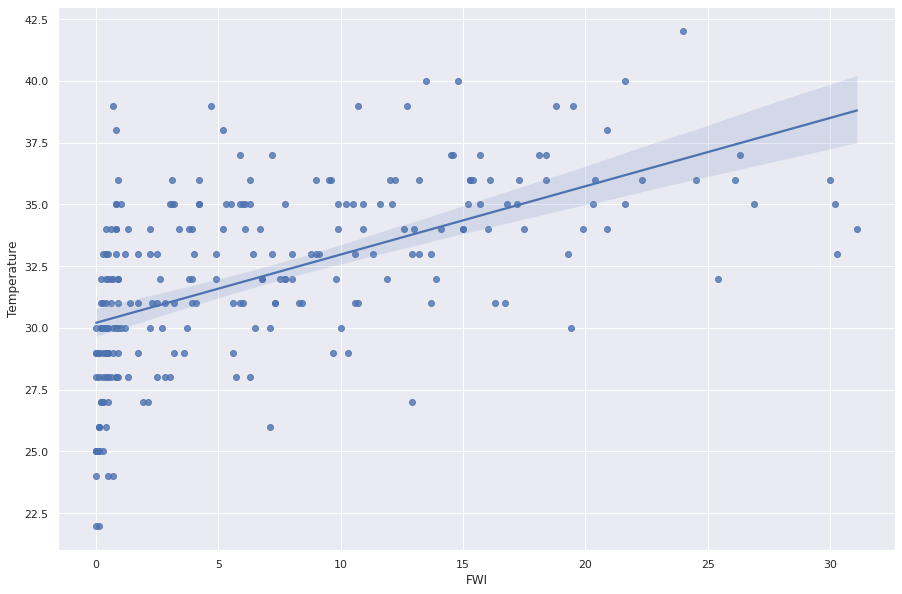

In [36]:
sns.regplot(x='FWI',y='Temperature',data=df1)

Text(0, 0.5, 'Temperature')

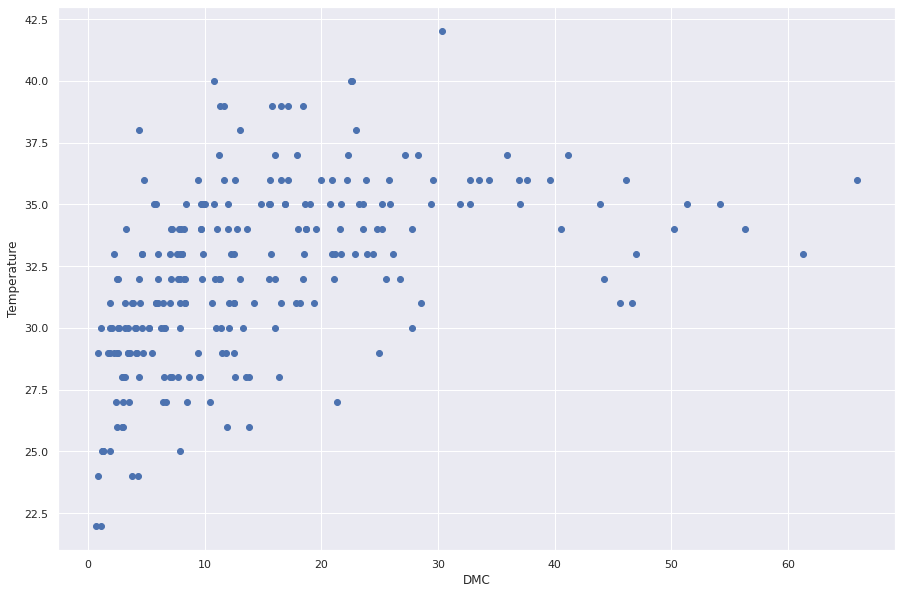

In [37]:
plt.scatter(df1['DMC'],df1['Temperature'])
plt.xlabel("DMC")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='DMC', ylabel='Temperature'>

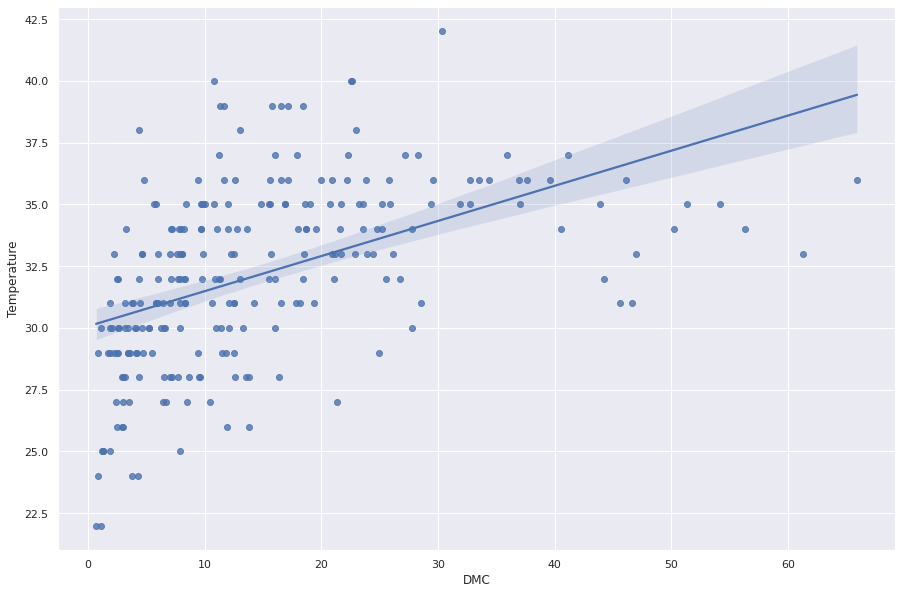

In [38]:
sns.regplot(x='DMC',y='Temperature',data=df1)

**Histogram**

-**A histogram is basically used to represent data provided in a form of sme groups**

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>],
       [<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>,
        <AxesSubplot:title={'center':'FWI'}>],
       [<AxesSubplot:title={'center':'Classes'}>,
        <AxesSubplot:title={'center':'Region'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

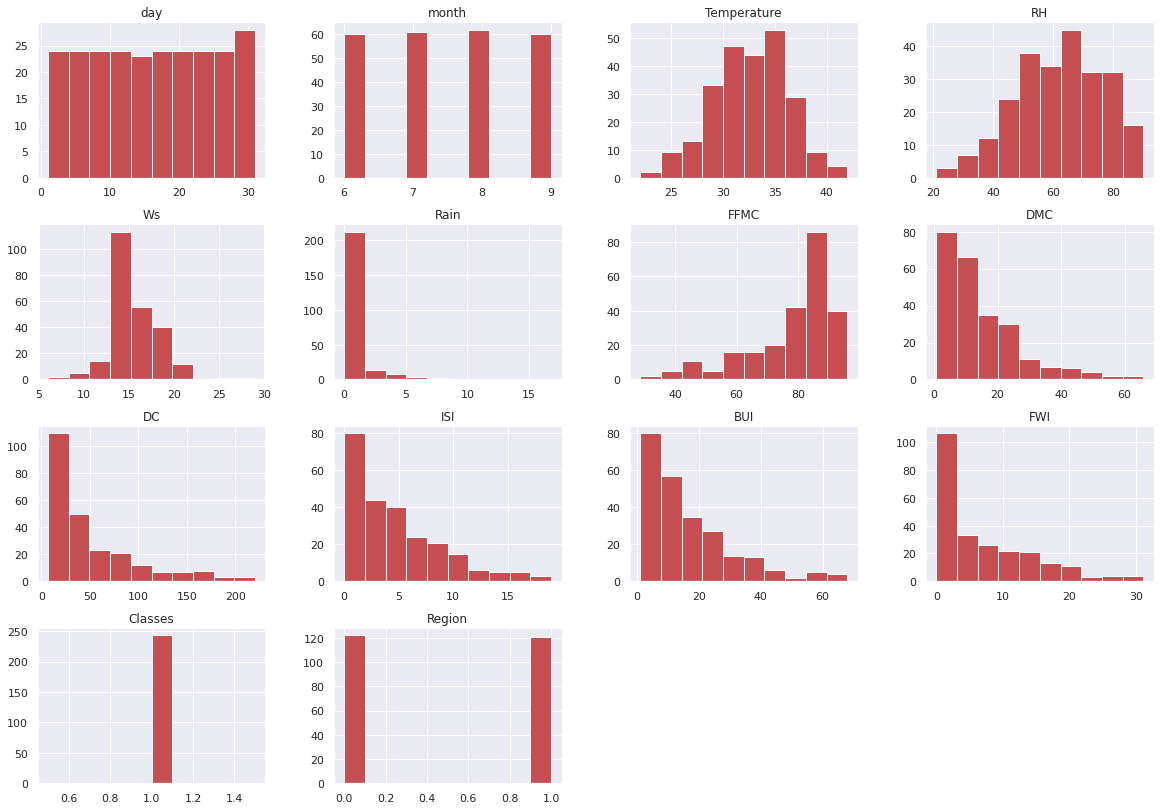

In [39]:
df1.hist(figsize=(20,14),color='r')

**Percentage for Pie Chart**

In [40]:
percentage=df.Classes.value_counts(normalize=True)*100
percentage

fire        56.378601
not fire    43.621399
Name: Classes, dtype: float64

**Plotting Pie chart**

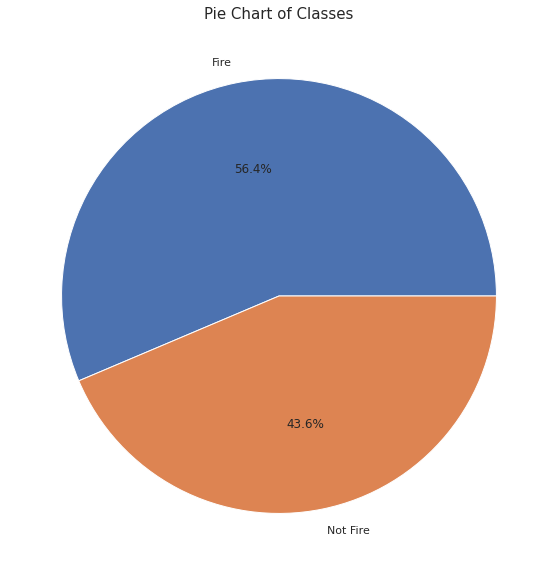

In [41]:
classes_labels=['Fire','Not Fire']
plt.figure(figsize=(15,10))
plt.pie(percentage,labels=classes_labels,autopct="%1.1f%%")
plt.title("Pie Chart of Classes",fontsize=15)
plt.show()

**Forest Fire Temperature Box Plot**

<AxesSubplot:xlabel='Temperature'>

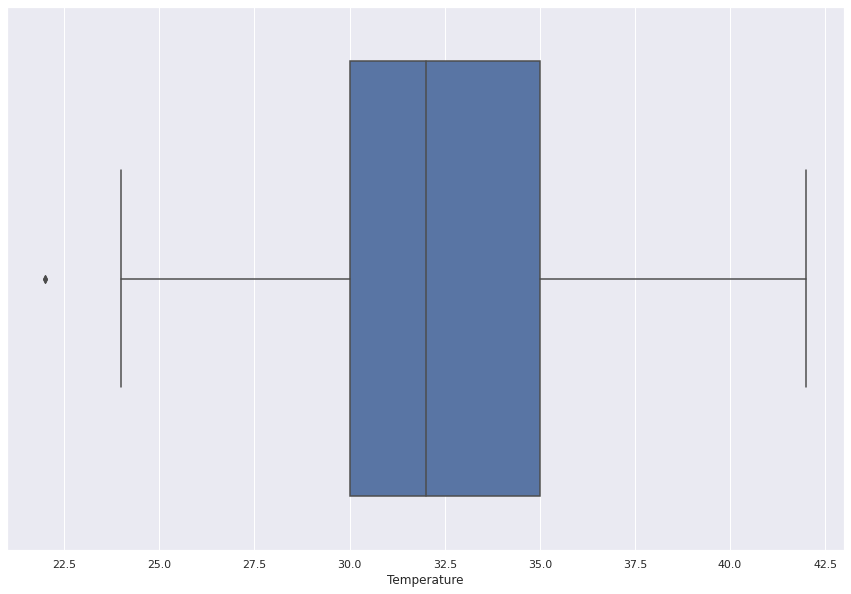

In [42]:
sns.boxplot(df1['Temperature'])

**Forest Fire Weather Index System[FWI] Boxplot**

<AxesSubplot:xlabel='FWI'>

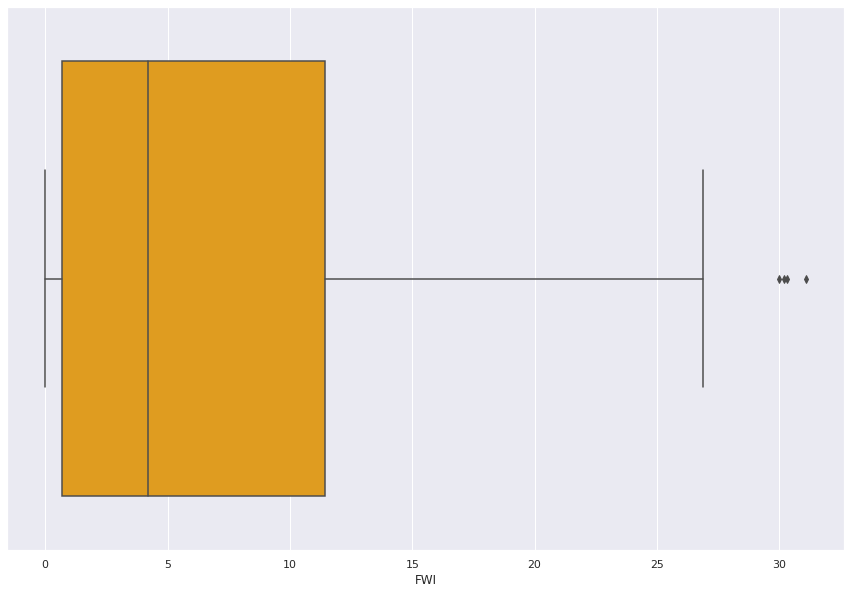

In [43]:
sns.boxplot(df['FWI'],color='orange')

# **4. Building Linear Regression Model**

In [44]:
df1

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1


In [45]:
x=df1.drop('Temperature',axis=1)

In [46]:
y=df1['Temperature']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=10)

In [48]:
X_train

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
25,26,6,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,1,0
121,30,9,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,1,0
174,23,7,71,17,0.0,87.3,46.6,99.0,6.9,46.5,16.3,1,1
72,12,8,51,13,0.3,81.3,15.6,75.1,2.5,20.7,4.2,1,0
186,4,8,35,15,0.0,93.8,23.0,42.7,15.7,22.9,20.9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,4,8,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9,1,0
15,16,6,89,13,0.7,36.1,1.7,7.6,0.0,2.2,0.0,1,0
229,16,9,26,13,0.0,93.9,21.2,59.2,14.2,22.4,19.3,1,1
125,4,6,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,1,1


In [49]:
X_test

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
46,17,7,70,14,0.0,82.8,9.4,34.1,3.2,11.1,3.6,1,0
226,13,9,49,19,0.0,88.6,11.5,33.4,9.1,12.4,10.3,1,1
181,30,7,56,16,0.0,88.9,23.8,57.1,8.2,23.8,13.2,1,1
116,25,9,81,21,5.8,48.6,3.0,7.7,0.4,3.0,0.1,1,0
124,3,6,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,6,6,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,1,1
242,29,9,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1
208,26,8,37,16,0.0,92.2,61.3,167.2,13.1,64.0,30.3,1,1
102,11,9,77,21,1.8,58.5,1.9,8.4,1.1,2.4,0.3,1,0


In [50]:
y_train

25     31
121    25
174    31
72     35
186    38
       ..
64     34
15     29
229    33
125    30
9      28
Name: Temperature, Length: 162, dtype: int64

In [51]:
y_test

46     29
226    29
181    36
116    26
124    29
       ..
127    35
242    24
208    33
102    30
78     36
Name: Temperature, Length: 81, dtype: int64

In [52]:
scaler=StandardScaler()

In [53]:
x_train_scaled=scaler.fit_transform(X_train)

In [54]:
x_train_scaled

array([[ 1.30705791, -1.39305207,  0.06835876, ...,  0.52024214,
         0.        , -1.01242284],
       [ 1.77217242,  1.29354835,  0.99672801, ..., -0.93452011,
         0.        , -1.01242284],
       [ 0.95822202, -0.4975186 ,  0.53254338, ...,  1.30997022,
         0.        ,  0.9877296 ],
       ...,
       [ 0.14427163,  1.29354835, -2.45150064, ...,  1.72561657,
         0.        ,  0.9877296 ],
       [-1.2510719 , -1.39305207,  0.06835876, ..., -0.8098262 ,
         0.        ,  0.9877296 ],
       [-0.55340014, -1.39305207,  1.0630401 , ..., -0.82368108,
         0.        , -1.01242284]])

In [55]:
x_test_scaled=scaler.transform(X_test)

In [56]:
x_test_scaled

array([[ 0.26055026, -0.4975186 ,  0.46623129, ..., -0.44959936,
         0.        , -1.01242284],
       [-0.20456425,  1.29354835, -0.92632258, ...,  0.4786775 ,
         0.        ,  0.9877296 ],
       [ 1.77217242, -0.4975186 , -0.46213796, ...,  0.88046898,
         0.        ,  0.9877296 ],
       ...,
       [ 1.30705791,  0.39801488, -1.72206765, ...,  3.24965322,
         0.        ,  0.9877296 ],
       [-0.43712151,  1.29354835,  0.93041592, ..., -0.90681035,
         0.        , -1.01242284],
       [ 0.37682889,  0.39801488, -0.59476213, ...,  1.28226046,
         0.        , -1.01242284]])

**Model Training**

In [57]:
regression=LinearRegression()

In [58]:
regression.fit(x_train_scaled,y_train)

LinearRegression()

In [59]:
#print the coefficients & intercept
print(regression.coef_)
#regression.score(x_test_scaled,y_test)

[-0.36440793 -0.22635361 -1.44134283 -0.7142619  -0.23278709  0.96421264
 -0.01542755  0.65162217  0.13076922  0.26277398 -0.28088408  0.
  0.24272792]


In [60]:
print(regression.intercept_)

32.074074074074076


In [61]:
reg_pred=regression.predict(x_test_scaled)

In [62]:
reg_pred

array([31.84063173, 33.08286672, 33.29508782, 24.75854227, 29.24684893,
       33.62257975, 31.75352242, 34.58358479, 31.72328528, 32.36866716,
       33.67767751, 33.25839479, 35.65738396, 31.97503396, 34.04296478,
       33.22479669, 26.47624061, 36.04714436, 33.19344089, 23.64162513,
       32.1343707 , 32.60093493, 33.02495519, 32.94209422, 29.99121682,
       32.68893888, 33.04332061, 32.27268269, 32.09347766, 34.07041738,
       34.51057574, 33.74628677, 34.33569821, 32.69179752, 31.163211  ,
       28.76146317, 32.70115088, 31.76403503, 33.04719502, 34.07436881,
       33.80864285, 35.5411224 , 34.22166608, 37.18514799, 32.83625502,
       36.64474361, 32.38777677, 35.33018647, 30.75190986, 30.94859328,
       32.28439034, 39.1982583 , 32.58656685, 34.55522617, 27.14324627,
       36.9254135 , 33.79514082, 33.90475288, 29.13300329, 32.27931989,
       32.48201446, 32.01342537, 24.82170293, 36.32093954, 36.06160239,
       29.12469145, 29.4759838 , 29.4409954 , 36.02022222, 28.49

**ASSUMPTIONS OF LINEAR REGRESSION**

Text(0, 0.5, 'Test Predicted Data')

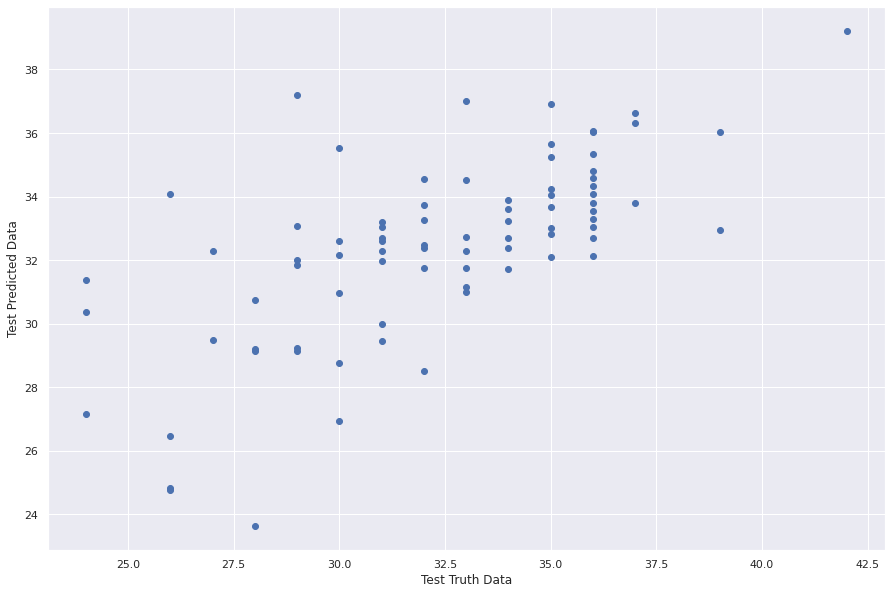

In [63]:
#if we are plotting  y_test,reg_pred relation should be linear
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [64]:
residuals=y_test-reg_pred

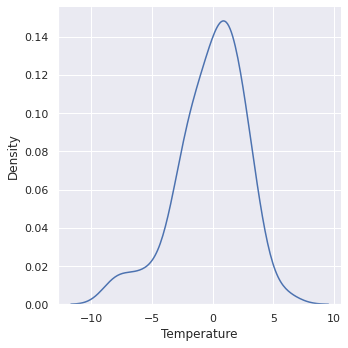

In [65]:
sns.displot(residuals,kind="kde")

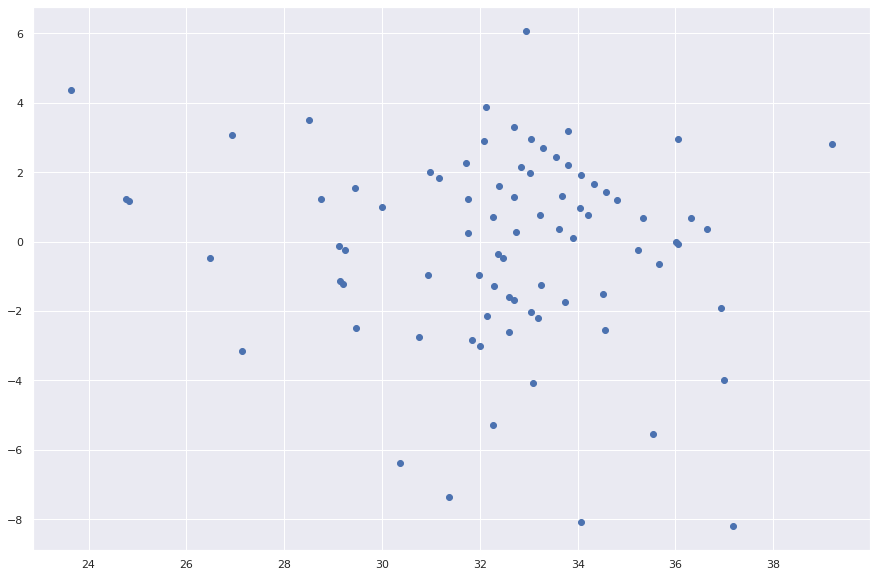

In [66]:
plt.scatter(reg_pred,residuals)

**Performance Metrics**

In [67]:
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7.718372490369679
2.1359729920427832
2.7781959056858603


**R SQUARE & ADJUSTED R SQUARE**

In [68]:
score=r2_score(y_test,reg_pred)
score

0.442435458586767

**Now we test the accuracy of the model using Adjusted R2**

**But why to test the accuracy of the model using Adjusted R2,when we have already tested the accuracy of the model using R2,**

**It is because the accuracy of the model under R2 will increase as and when we increase the no of features(x)**

**But the Adjusted R2 will remain unaffected inspite of No of features(x) we take , so R2 is less reliable then Adjusted R2**

In [69]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)

0.3342512938349457

# **5. Ridge Regression**

**Ridge Regression (also called as L2 Regularization),the main aim of ridge regression is to reduce overfitting**

In [70]:
ridge=Ridge()

In [71]:
ridge.fit(x_train_scaled,y_train)

Ridge()

In [72]:
print(ridge.coef_)

[-0.35859242 -0.22361881 -1.4246319  -0.71357223 -0.23419537  0.96377519
  0.02101355  0.62937949  0.10421058  0.21661456 -0.22339104  0.
  0.23878478]


In [73]:
print(ridge.intercept_)

32.074074074074076


In [74]:
print(ridge.intercept_)

32.074074074074076


In [75]:
ridge_pred=ridge.predict(x_test_scaled)

In [76]:
ridge_pred

array([31.84522025, 33.07801866, 33.32143372, 24.79311009, 29.25112242,
       33.64529216, 31.73250629, 34.61248132, 31.74324356, 32.36616109,
       33.66795511, 33.25653199, 35.63844353, 31.96899817, 33.96914585,
       33.23538038, 26.51482354, 36.03947803, 33.1811996 , 23.66716673,
       32.09793728, 32.58109242, 33.0232019 , 32.94038806, 29.98560291,
       32.70770994, 33.04393524, 32.25760392, 32.08900203, 34.04925765,
       34.50009163, 33.73910985, 34.31012523, 32.69207555, 31.13817866,
       28.77144618, 32.67740941, 31.75746455, 33.04099284, 34.04747401,
       33.83814527, 35.52736647, 34.22117957, 37.13751492, 32.83627381,
       36.68161808, 32.36960708, 35.31854183, 30.73882088, 30.95562496,
       32.291368  , 39.20825907, 32.57797449, 34.55202448, 27.17475543,
       36.9522104 , 33.81487792, 33.86236693, 29.15322938, 32.26413039,
       32.47914425, 32.00320521, 24.82974268, 36.34245785, 36.10298328,
       29.15073976, 29.45086263, 29.43904153, 36.0418111 , 28.50

**ASSUMPTIONS OF LINEAR REGRESSION**

Text(0, 0.5, 'Test Predicted Data')

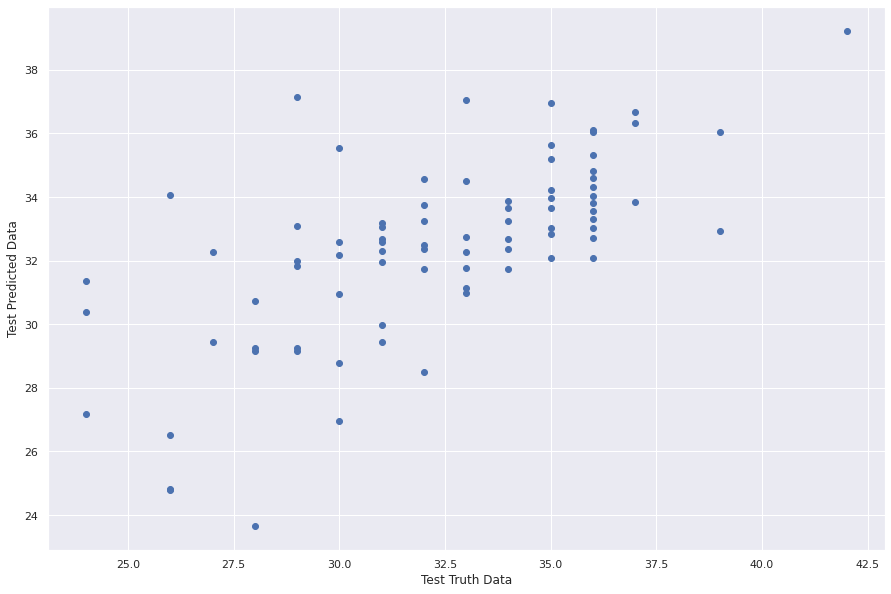

In [77]:
#if we are plotting  y_test,reg_pred relation should be linear
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [78]:
residuals=y_test-ridge_pred

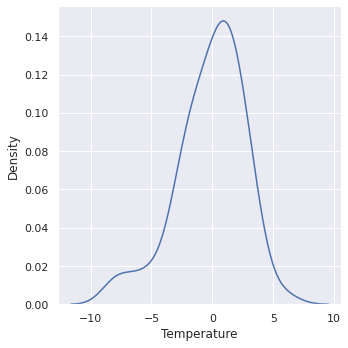

In [79]:
sns.displot(residuals,kind="kde")

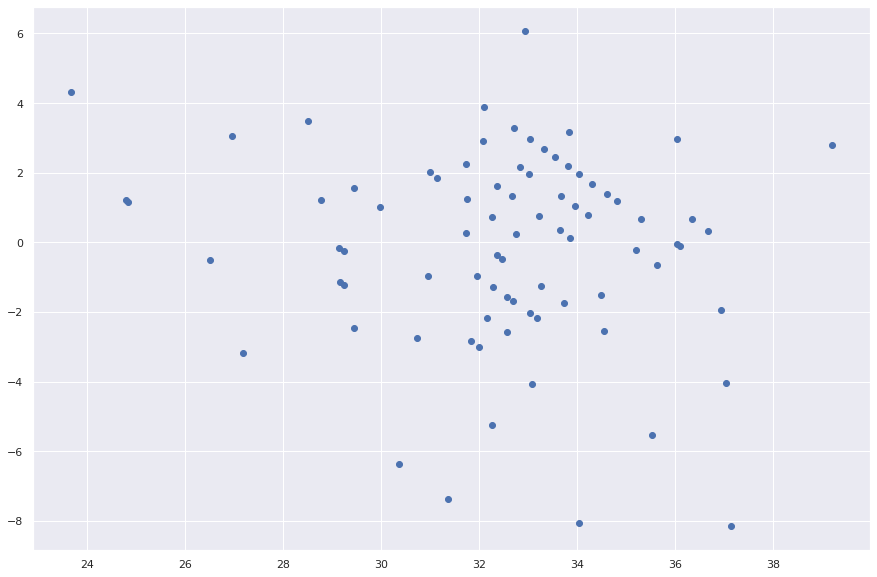

In [80]:
plt.scatter(ridge_pred,residuals)

**Performance Metrics**

In [81]:
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

7.7001695278452145
2.1363570878417484
2.774917931731534


**R SQUARE & ADJUSTED R SQUARE**

In [82]:
score=r2_score(y_test,reg_pred)
score

0.442435458586767

**Now we test the accuracy of the model using Adjusted R2**

**But why to test the accuracy of the model using Adjusted R2,when we have already tested the accuracy of the model using R2,**

**It is because the accuracy of the model under R2 will increase as and when we increase the no of features(x)**

**But the Adjusted R2 will remain unaffected inspite of No of features(x) we take , so R2 is less reliable then Adjusted R2**

In [83]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)

0.3342512938349457

# **6. LASSO**

* LASSO Regression(also called as L1 Norm/L1 Regularization),the main aim of LASSO regressio is to reduce the features which are least correlated with dependent variables .

* If our datasets has outliers we should use LASSO .

In [84]:
lasso=Lasso()
lasso

Lasso()

In [85]:
lasso.fit(x_train_scaled,y_train)

Lasso()

In [86]:
print(lasso.coef_)

[ 0.         -0.         -0.88423537 -0.         -0.          0.88313134
  0.          0.          0.          0.          0.          0.
  0.        ]


In [87]:
print(lasso.intercept_)

32.074074074074076


In [88]:
lasso_pred=lasso.predict(x_test_scaled)

In [89]:
lasso_pred

array([31.99263189, 33.56261409, 33.16968133, 29.35085197, 29.41532603,
       33.00570181, 32.24618859, 33.57987995, 32.17946599, 33.03180429,
       32.43352237, 32.64830012, 34.42463082, 31.61671515, 32.83763259,
       33.35142638, 29.33942467, 34.79854886, 32.38506498, 29.63719153,
       32.36854863, 32.21265622, 32.60134175, 31.81897394, 31.16330572,
       32.75364414, 32.88409128, 32.36320974, 32.04108928, 31.96868565,
       33.24608236, 33.07067555, 33.54659742, 32.57214892, 31.41161583,
       30.06340682, 32.79726231, 32.13550568, 33.36310351, 33.22497663,
       33.25167109, 34.07840658, 33.22831682, 33.75728546, 32.90619636,
       34.59903828, 32.34644356, 33.72050521, 31.73648451, 31.41845375,
       32.26170559, 35.46055533, 32.15686124, 33.60932262, 29.07618954,
       34.41195434, 33.23999395, 32.50358516, 29.88575148, 32.20406944,
       32.0385909 , 31.44605525, 29.20463799, 34.49394409, 33.4095622 ,
       30.24824223, 31.37474327, 30.84852284, 34.06622977, 30.49

**ASSUMPTIONS OF LINEAR REGRESSION**

Text(0, 0.5, 'Test Predicted Data')

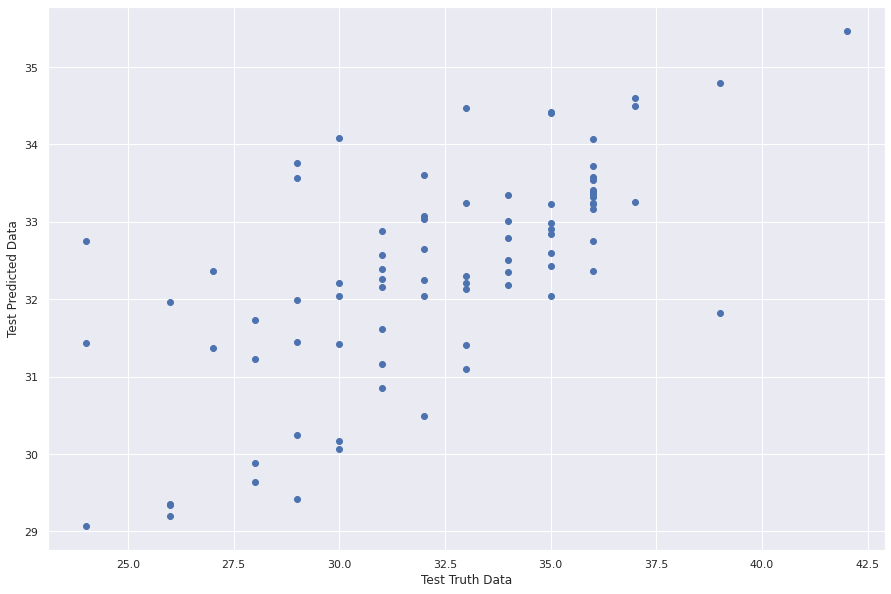

In [90]:
#if we are plotting  y_test,reg_pred relation should be linear
plt.scatter(y_test,lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [91]:
residuals=y_test-lasso_pred

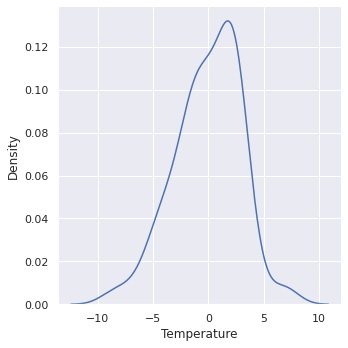

In [92]:
sns.displot(residuals,kind="kde")

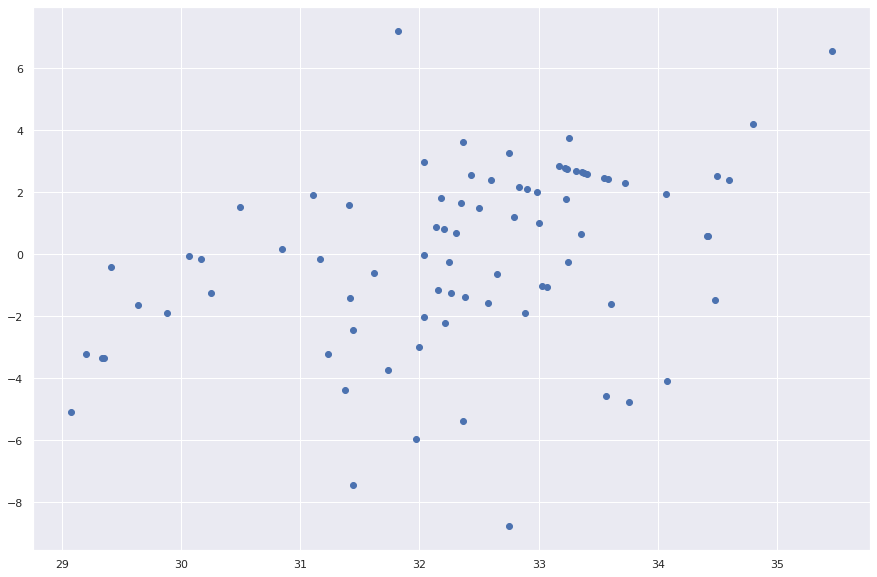

In [93]:
plt.scatter(lasso_pred,residuals)

**Performance Metrics**

In [94]:
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

8.69462464944341
2.370968686727018
2.9486648927003234


**R SQUARE & ADJUSTED R SQUARE**

In [95]:
score=r2_score(y_test,lasso_pred)
score

0.3719123543887275

In [96]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)

0.250044602255197

# **7. ElasticNet**

**ElasticNet is a combination of Ridge & LAASO Regression**

In [97]:
elastic_net=ElasticNet()

In [98]:
elastic_net.fit(x_train_scaled,y_train)

ElasticNet()

In [99]:
print(elastic_net.coef_)

[-0.         -0.         -0.77155493 -0.27327033 -0.02945645  0.70980198
  0.11177449  0.          0.20914599  0.04593431  0.12829249  0.
  0.        ]


In [100]:
print(elastic_net.intercept_)

32.074074074074076


In [101]:
elastic_net_pred=elastic_net.predict(x_test_scaled)

In [102]:
elastic_net_pred

array([31.9573208 , 33.23686908, 33.35699564, 28.69175409, 29.50702659,
       33.21952486, 31.75246849, 33.96237735, 32.10800305, 32.71913539,
       32.6464949 , 32.70818669, 34.28160866, 31.98757886, 32.58127398,
       33.38088877, 29.25544946, 35.1329971 , 32.41345187, 28.81942678,
       31.92062398, 32.01321369, 32.87611371, 32.19248582, 30.76147509,
       32.77885483, 32.9241576 , 31.80574265, 31.84088675, 32.63570681,
       33.35824365, 32.97725238, 33.16526411, 32.6259555 , 31.48228091,
       29.90876877, 32.28704956, 31.73349961, 33.28556103, 32.87586141,
       33.61368581, 34.06687234, 33.48616338, 34.31378768, 32.80354959,
       35.56194932, 31.98083723, 34.20080511, 31.06352775, 31.3703163 ,
       32.33015611, 36.68465163, 32.02910227, 33.90164802, 29.13016242,
       35.33664404, 33.44975962, 32.59500157, 29.89482886, 32.07728159,
       32.39209933, 31.39172713, 28.33121558, 35.11153428, 34.62534381,
       30.33956758, 30.58992082, 30.41863187, 34.79501455, 29.86

**ASSUMPTIONS OF LINEAR REGRESSION**

Text(0, 0.5, 'Test Predicted Data')

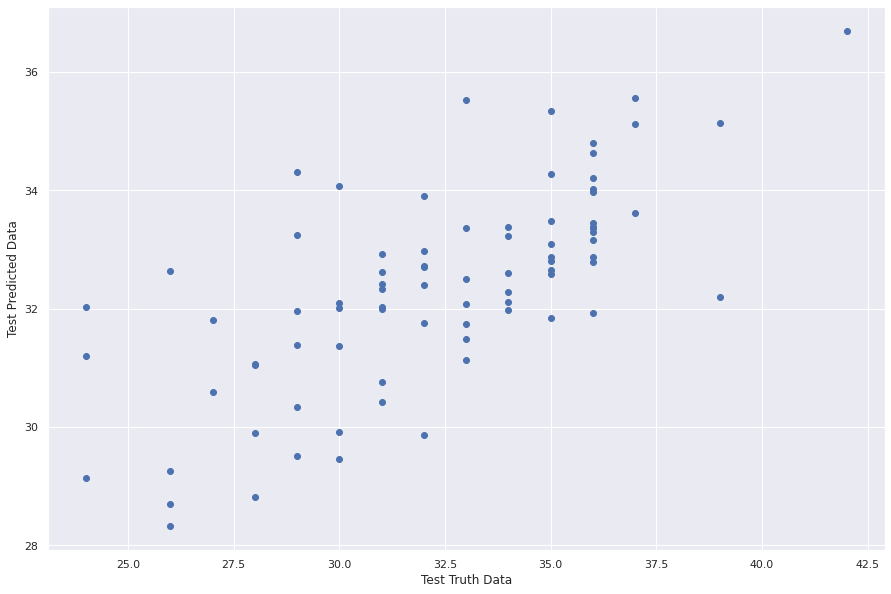

In [103]:
#if we are plotting  y_test,reg_pred relation should be linear
plt.scatter(y_test,elastic_net_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [104]:
residuals=y_test-elastic_net_pred

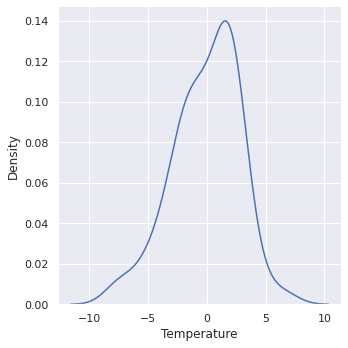

In [105]:
sns.displot(residuals,kind="kde")

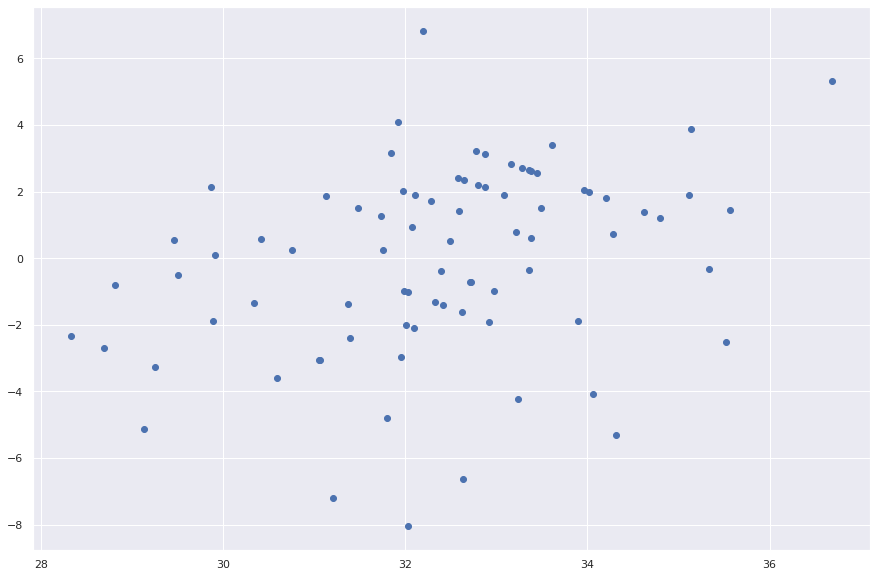

In [106]:
plt.scatter(elastic_net_pred,residuals)

**Performance Metrics**

In [107]:
print(mean_squared_error(y_test,elastic_net_pred))
print(mean_absolute_error(y_test,elastic_net_pred))
print(np.sqrt(mean_squared_error(y_test,elastic_net_pred)))

7.918267418307838
2.279648251186519
2.813941616009088


**R SQUARE & ADJUSTED R SQUARE**

In [108]:
score=r2_score(y_test,elastic_net_pred)
score

0.4279953257782334

**Now we test the accuracy of the model using Adjusted R2**

**But why to test the accuracy of the model using Adjusted R2,when we have already tested the accuracy of the model using R2,**

**It is because the accuracy of the model under R2 will increase as and when we increase the no of features(x)**

**But the Adjusted R2 will remain unaffected inspite of No of features(x) we take , so R2 is less reliable then Adjusted R2**

In [109]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1)

0.317009344212816

#